In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from smithplot import SmithAxes

Here we model a parallel RLC, with a series LC in parallel and a series R.

The lc values come from the measured data and the r values by tweaking to fit.

In [40]:
# series
cs = 361e-12
ls = 473e-9
rs = 2.5
# parallel
cp = 1211e-12
lp = 126e-9
rp = 400
def znet(f):
    """Impedance of the network at f Hz"""
    w = 2 * np.pi * f
    zcs = 1 / (w * cs * 1j)
    zls = w * ls * 1j
    zcp = 1 / (w * cp * 1j)
    zlp = w * lp * 1j
    ys = 1 / (zcs + zls)
    ycp = 1 / zcp
    ylp = 1 / zlp
    yrp = 1 / rp
    yt = ycp + ylp + ys + yrp
    zt = 1 / yt
    return rs + zt

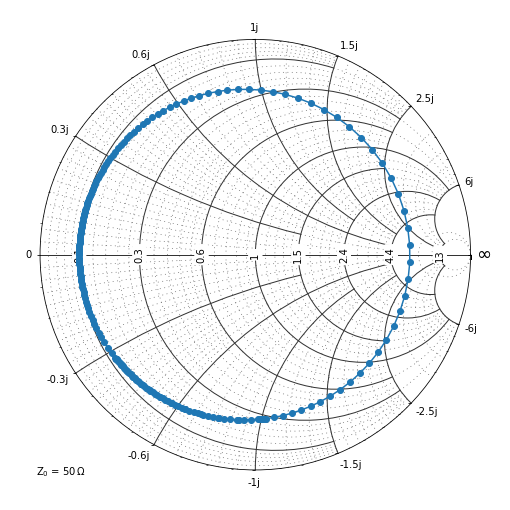

In [41]:
plt.figure(figsize=(9, 9))
freqs = np.linspace(10e6, 20e6, 200)
zs = [znet(f) for f in freqs]
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(zs, datatype=SmithAxes.Z_PARAMETER);

In [39]:
#zs#freqs.min(), min(zs), max(zs)